In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler

from artlearn import SFAM

sns.set()

In [2]:
def prepare_data():
    X, y = make_blobs(n_samples=300, centers=6, n_features=2, cluster_std=0.6, random_state=0)
    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)
    X_ = X.copy()
    X_ = np.hstack([X, 1.0 - X_])
    return X_, y

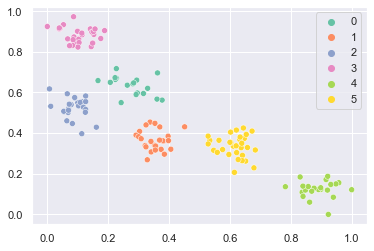

In [3]:
# prepare data
X, y = prepare_data()
sns.scatterplot(x=X[:150, 0], y=X[:150, 1], hue=y[:150], palette="Set2")
plt.show()

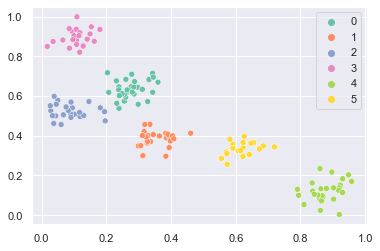

In [4]:
# prepare data
X, y = prepare_data()
sns.scatterplot(x=X[150:, 0], y=X[150:, 1], hue=y[150:], palette="Set2")
plt.show()

In [5]:
# learning
clf = SFAM(max_iter=100, max_class=100, rho=0.9, alpha=1e-5, beta=0.1)
clf.fit(X[:150], y[:150])
y_pred = clf.predict(X[150:])

score: 0.9333333333333333


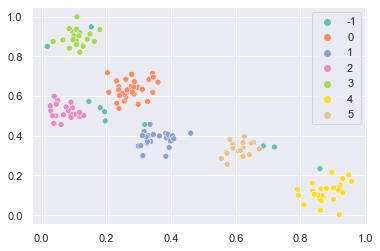

In [6]:
print("score:", clf.score(X[150:], y[150:]))
sns.scatterplot(x=X[150:, 0], y=X[150:, 1], hue=y_pred, palette="Set2")
plt.show()